# **Data Preprocessing**

Data preprocessing is divided into two main processes: 

#### **Removing Silence**

To be able to remove silence, two different processes are carried out.

- `Trimming`, which is the process of removing the beginning and end of the silent audio.
- `Split and concatination`, which is the middle of the audio. This process separates the non-silent audio into separate segments, and recombines the segments.

#### **Framing**

This process divides the audio into small segments of equal duration, called `frames`. Each frame usually overlaps with the previous frame to maintain the continuity of the audio. The length of each frame is affected by the `frame_length` parameter, while the transition between frames is affected by the `hop_length` parameter.


### **Implementation**

1. Import the necessary `libraries` and define the `variables` used. Change the variables value accordingly.

In [3]:
# Import library
import os
import math
import numpy as np
import librosa
import soundfile
import matplotlib.pyplot as plt
from tabulate import tabulate
from tqdm import tqdm
from audiomentations import PitchShift, BandPassFilter

SAMPLE_RATE = 44100
FRAME_LENGTH = 30 * SAMPLE_RATE
HOP_LENGTH = 5 * SAMPLE_RATE
INPUT_DIRECTORY = "Dataset/Mujawwad1"
OUTPUT_DIRECTORY = "Dataset/Mujawwad1_(hop=5)"

2. Perform data preprocessing by `iterating` through `each file` in `each maqam folder` in the `input directory`, and then `save` the audio segments in the `output directory`.

In [ ]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    # Audio preprocessing
    y, _ = librosa.effects.trim(y=y)
    non_silent_intervals = librosa.effects.split(y, top_db=30)
    y = np.concatenate([y[start:end] for start, end in non_silent_intervals])
    return y

def process_maqam_folder(maqam_folder):
    print(f">\tProcessing {maqam_folder}...")
    input_maqam_path = os.path.join(INPUT_DIRECTORY, maqam_folder)
    output_maqam_path = os.path.join(OUTPUT_DIRECTORY, maqam_folder)
    if not os.path.exists(output_maqam_path):
        os.makedirs(output_maqam_path)
    total_files = len(os.listdir(output_maqam_path))
    for file in tqdm(os.listdir(input_maqam_path)):
        file_path = os.path.join(input_maqam_path, file)
        # Load audio files
        y = load_audio(file_path)
        if len(y) >= FRAME_LENGTH:
            y_framed = librosa.util.frame(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
            for index in range(y_framed.shape[1]):
                segment = y_framed[:, index]
                output_filename = f"{maqam_folder}_{total_files:03d}.wav"
                output_path = os.path.join(output_maqam_path, output_filename)
                soundfile.write(output_path, segment, SAMPLE_RATE)
                total_files += 1
    print(f"\tTotal files created: {total_files}")
    
maqam_folders = os.listdir(INPUT_DIRECTORY)
for maqam_folder in maqam_folders :
    process_maqam_folder(maqam_folder)

3. Display `dataset distribution` by `maqams`

Maqam       Number Of Files  Total Duration    Distribution Percentage
--------  -----------------  ----------------  -------------------------
Bayati                   32  5215.843 s        18.12%
Hijaz                    46  4259.713 s        14.80%
Jiharkah                 51  3822.742 s        13.28%
Nahawand                 38  4353.000 s        15.13%
Rast                     35  4144.802 s        14.40%
Saba                     34  3613.938 s        12.56%
Sikah                    33  3369.306 s        11.71%

Total Files: 269
Total Duration: 28779.344 h

Total Duration: 7.994 h


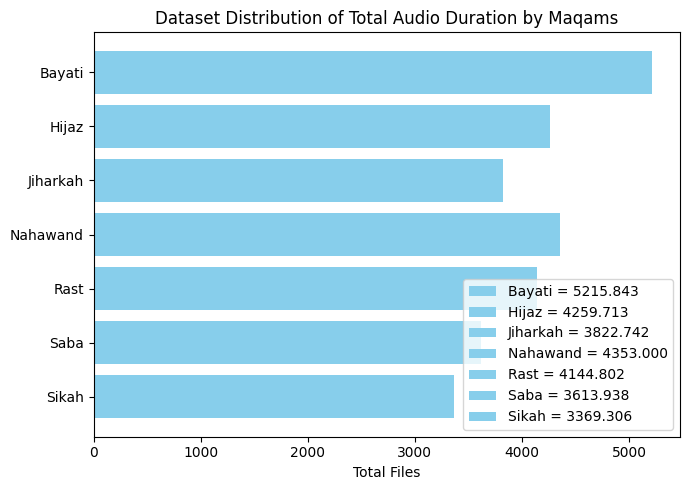

In [26]:
# Function to display dataset distribution
def display_dataset_dist(directory=""):
    maqam_info = {}
    for maqam in os.listdir(directory):
        input_maqam_path = os.path.join(directory, maqam)
        if os.path.isdir(input_maqam_path):
            maqam_duration = 0
            num_files = 0
            for file_name in os.listdir(input_maqam_path):
                if file_name.endswith('.wav'):
                    audio_path = os.path.join(input_maqam_path, file_name)
                    duration = librosa.get_duration(path=audio_path)
                    maqam_duration += duration
                    num_files += 1
            maqam_info[maqam] = {'num_files': num_files, 'duration': maqam_duration}
    
    # Display dataset distribution table
    table_data = []
    total_files = sum(info['num_files'] for info in maqam_info.values())
    total_duration = sum(info['duration'] for info in maqam_info.values())
    for maqam, info in maqam_info.items():
        percentage = (info['duration'] / total_duration) * 100
        table_data.append([maqam, info['num_files'], f"{info['duration']:.3f} s", f"{percentage:.2f}%"])
    print(tabulate(table_data, headers=["Maqam", "Number Of Files", "Total Duration", "Distribution Percentage"], tablefmt="simple"))
    print(f"\nTotal Files: {total_files}")
    print(f"Total Duration: {total_duration:.3f} h\n")
    print(f"Total Duration: {total_duration / 60 / 60:.3f} h\n") 
    
    # Display dataset distribution chart
    # maqams = list(maqam_info.keys())
    # durations = [info['duration'] for info in maqam_info.values()]
    # plt.figure(figsize=(12, 6))
    # plt.subplot(1, 2, 1)
    # plt.barh(maqams, durations, color='skyblue')
    # plt.xlabel('Total Duration (seconds)')
    # plt.suptitle('Dataset Distribution of Total Audio Duration by Maqams')
    # plt.subplot(1, 2, 2)
    # plt.pie(durations, labels=maqams, autopct='%1.2f%%', startangle=140)
    # plt.axis('equal')
    # plt.tight_layout()
    # plt.show()
    
    maqams = list(maqam_info.keys())
    num_files = [info['num_files'] for info in maqam_info.values()]
    durations = [info['duration'] for info in maqam_info.values()]
    plt.figure(figsize=(7, 5))
    bars = plt.barh(maqams[::-1], durations[::-1], color='skyblue', label='Total Files')
    plt.xlabel('Total Files')
    plt.title('Dataset Distribution of Total Audio Duration by Maqams')
    legend_labels = {maqam: duration for maqam, duration in zip(maqams, durations)}
    plt.legend(handles=bars, labels=[f'{maqam} = {duration:.3f}' for maqam, duration in legend_labels.items()])
    plt.tight_layout()
    plt.show()

display_dataset_dist(directory="Dataset/Mujawwad1")

3. Display `dataset distribution` by `reciters`

Total duration grouped by MAM, DH, MZA, OTHER:
MAM: 1175.709 seconds
DH: 14637.351 seconds
MZA: 4195.305 seconds
OTHER: 8770.979 seconds
All: 28779.344 seconds


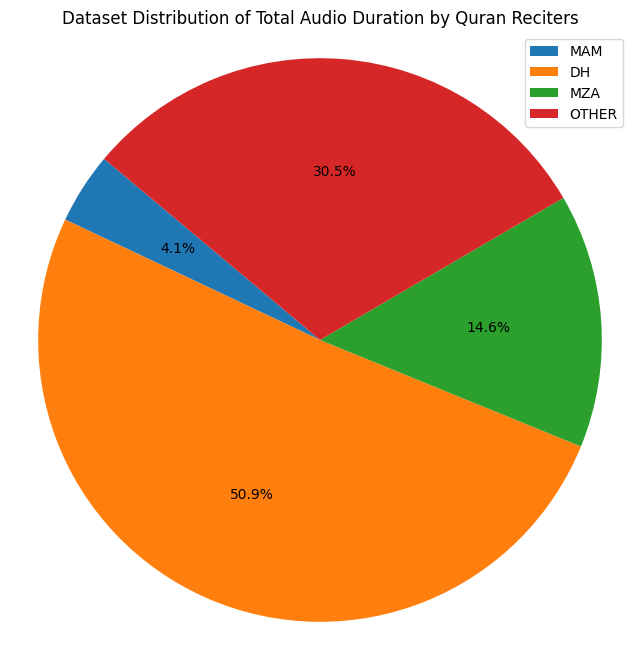

In [6]:
# Function to display maqam distribution grouped by reciters
def total_duration_audio_grouped(directory):
    total_duration_MAM = 0
    total_duration_DH = 0
    total_duration_MZA = 0
    total_duration_OTHER = 0 
    total_duration_all = 0

    for maqam in os.listdir(directory):
        input_maqam_path = os.path.join(directory, maqam)
        for filename in os.listdir(input_maqam_path):
            if filename.endswith('.wav'):  # Adjust file extensions as needed
                file_path = os.path.join(input_maqam_path, filename)
                duration = librosa.get_duration(path=file_path)
    
                # Parse filename to determine the group
                group = filename.split('_')[1]  # Assuming the format is "Saba_GROUP_1.wav"
    
                if group == 'MAM':
                    total_duration_MAM += duration
                elif group == 'DH':
                    total_duration_DH += duration
                elif group == 'MZA':
                    total_duration_MZA += duration
                elif group == 'other':
                    total_duration_OTHER += duration
                total_duration_all += duration

    return {
        'MAM': total_duration_MAM,
        'DH': total_duration_DH,
        'MZA': total_duration_MZA,
        'OTHER': total_duration_OTHER,
        'All': total_duration_all
    }

directory_path = 'Dataset/Mujawwad1'
total_duration_grouped = total_duration_audio_grouped(directory_path)
print("Total duration grouped by MAM, DH, MZA, OTHER:")
for group, duration in total_duration_grouped.items():
    print(f"{group}: {duration:.3f} seconds")
    
# Prepare data for the pie chart
labels = ['MAM', 'DH', 'MZA', 'OTHER']
sizes = [total_duration_grouped['MAM'], total_duration_grouped['DH'], total_duration_grouped['MZA'], total_duration_grouped['OTHER']]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="upper right")
plt.title('Dataset Distribution of Total Audio Duration by Quran Reciters')
plt.show()